# Week 7 Assignment - Linear Models

In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression and Part 2 will look at classification.

## Part 1 - Regression

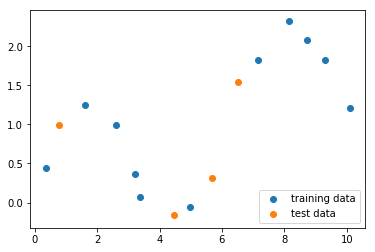

In [1]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)#set the random seed.
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5 
#np.linspace(s,e,n) to generate n numbers from the range(s,e) with equal intervals. 
#np.random.randn(n) to generate n random numbers.
y = np.sin(x)+x/6 + np.random.randn(n)/10 # create the 'real model'


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4);


### Question 1

Write code that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. 

(Use for loop.)

(Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model)

> `poly = PolynomialFeatures(degree=n)`

> `X_train_poly = poly.fit_transform(X_train.reshape(-1,1))`

> `linreg=LinearRegression().fit(X_train_poly, y_train)`

**2D data should be passed to polynomialfeature transformation and prediction, so you need use `.reshape(-1,1)` to X_train.**

For each model (degree 1,3,6,9), find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`).  
> `p=np.linspace(0,10,100)`

** Remember you need use poly transform on new data too.**

> `p_poly=poly.fit_transform(p.reshape(-1,1))`

> `pred_y=linreg.predict(p_poly)`

Store the prediction in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

The shape of pred_y is (100,)

There are many ways to do this, here is one way, easier understood by beginners.

use a list to append pred_y, say, 

> `answer=[]# you need put this in right place`

> `answer.append(pred_y)`

and then use 

> answer_1=np.stack(answer)

> answer_1.shape

**This code should return a numpy array with shape `(4, 100)`**

Check the shape of X_train

In [2]:
X_train.shape

(11,)

Check the shape of X_train.reshape(-1,1)

In [3]:
X_train.reshape(-1,1).shape

(11, 1)

In [4]:
print(type(X_train))

<class 'numpy.ndarray'>


### Type Your code below, use answer_1 to store the predicted values.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Type Your code below, use answer_1 to store the predicted values.

answer=[]

for n in [1, 3, 6, 9]:
    poly = PolynomialFeatures(degree=n)
    X_train_poly = poly.fit_transform(X_train.reshape(-1,1))
    linreg=LinearRegression().fit(X_train_poly, y_train)
    p=np.linspace(0,10,100)
    p_poly=poly.fit_transform(p.reshape(-1,1))
    pred_y=linreg.predict(p_poly)
    
    p_poly=poly.fit_transform(p.reshape(-1,1))
    answer.append(pred_y)
    
    answer_1=np.stack(answer)
    answer_1.shape




answer_1        


array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

Check the shape of answer_1

In [7]:
answer_1.shape

(4, 100)

### Plot the prediction use the following function, make sure type the right numpy array name in the function

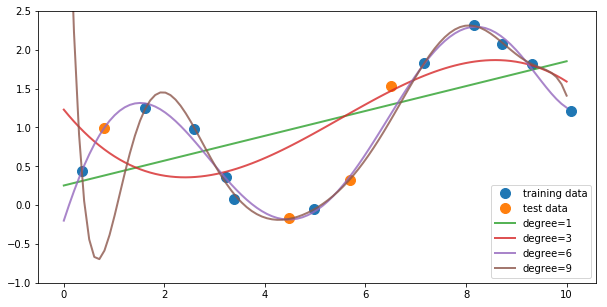

In [8]:
def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_1)

#### What can you tell from the picture above? Which models are overfitting, and which ones are underfitting? type below

degree = 1 is underfits the model by a lot. All it does is draw a line with a similar slope of the overall graph.

degree = 3 also underfits the model. It starts off curving in the wrong direction.

degree = 6 seems to be the best fit to the model. Most of the test data falls on the plotted path or is near to the path along with following the path of the training data as well.

degree = 9 over fits the data, and seems to be more fit to the training data.

### Question 2

Write code that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data,save the results into a pandas dataframe, use colomn names `['n degree','R2 on train','R2 on test']`

Remeber to reshape X_train, and X_test as in question 1

To get $R^2$, you can use
> `linreg.score(X_train_poly,y_train)`

Sort descendingly on 'R2 on test'

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Your code here
# X_train.reshape(-1,1)
# X_test.reshape(-1,1)
answer=[]

for n in range(10):
    poly = PolynomialFeatures(degree=n)
    X_train_poly = poly.fit_transform(X_train.reshape(-1,1))
    X_test_poly = poly.fit_transform(X_test.reshape(-1,1))
    linreg=LinearRegression().fit(X_train_poly, y_train)
    answer.append((n, linreg.score(X_train_poly,y_train), linreg.score(X_test_poly,y_test))) 
    answer_2 = pd.DataFrame(answer,columns=['n degree','R2 on train','R2 on test']) 

answer_2 

,n degree,R2 on train,R2 on test
0,0,0.000000,-0.478086
1,1,0.429246,-0.452371
2,2,0.451100,-0.068570
3,3,0.587200,0.005331
4,4,0.919419,0.730049
5,5,0.975786,0.877083
6,6,0.990182,0.921409
7,7,0.993525,0.920215
8,8,0.996375,0.632480
9,9,0.998037,-0.645248


In [28]:
answer_2.sort_values(['R2 on test'],ascending=[0])

,n degree,R2 on train,R2 on test
6,6,0.990182,0.921409
7,7,0.993525,0.920215
5,5,0.975786,0.877083
4,4,0.919419,0.730049
8,8,0.996375,0.632480
3,3,0.587200,0.005331
2,2,0.451100,-0.068570
1,1,0.429246,-0.452371
0,0,0.000000,-0.478086
9,9,0.998037,-0.645248


### Question 3

Based on the $R^2$ scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? Note: there may be multiple correct solutions to this question.

Type answer below




Degree levels that are underfitting: 0, 1, 2, 3

Degree levels that are overfitting: 9, 8, 4

Degree level 6 appears to be the best fit for the model overall. But 7 is close as well and then 5 is not that far off either.

### Bonus (2 points)
Try plotting the $R^2$ scores from question 2 to visualize the relationship.

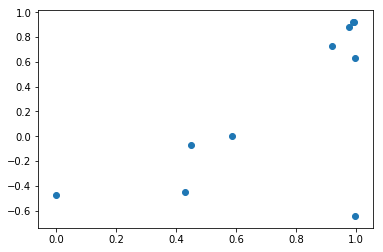

In [32]:
plt.scatter(answer_2['R2 on train'], answer_2['R2 on test'])

### Question 4

Training models on high degree polynomial features can result in overfitting. Train two models: a non-regularized LinearRegression model and a Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) on polynomial features of degree 12. Return the $R^2$ score for LinearRegression and Lasso model's test sets.

**Note, $R^2$ could be negative here, meaning it can be arbitrarily worse.**

In [92]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics.regression import r2_score

# Your code here
poly = PolynomialFeatures(degree=12)
X_train_poly = poly.fit_transform(X_train.reshape(-1,1))
X_test_poly = poly.fit_transform(X_test.reshape(-1,1))
linreg = LinearRegression().fit(X_train_poly, y_train)
lin_score = linreg.score(X_test_poly, y_test)


linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_poly, y_train)
lasso_score = linlasso.score(X_test_poly, y_test)

answer_4 = (f'LinearRegression R^2 value: {lin_score}, Lasso R^2 value{lasso_score}')# Your answer here
print(answer_4)


LinearRegression R^2 value: -4.311980555741178, Lasso R^2 value0.8406625614750356


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
